In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.draw import line

In [14]:
def read_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    
    if (img.shape == 4):
        img_rgb = img[:,:,:3]
        img_alpha = img[:,:,3]
        
        alpha = alpha[:,:,np.newaxis].astype(np.float32) / 255.0
        alpha = np.concatenate((alpha, alpha, alpha), axis=2)
        
        img = img_rgb.astype(np.float32)*alpha_factor + np.ones_like(img_rgb)*255*(1-alpha_factor)
        img = img.astype(np.uint8)
    
    return img

def metropolis_hastings(stat_dist, ini_point, it_num, bandwidth):
    # Initialize everything
    it_list = [None]*(it_num + 1)
    img_dims = stat_dist.shape
    xlim, ylim = image_dims
    it_list[0] = ini_point
    
    # Function which generates a proposal until we're always within
    # the boundary of the image
    def gen_new_pixel(loc, scale):
        return_count = 1
        
        while return_count:
            new_pixel = tuple(int(round(i)) for i in np.random.normal(loc, scale))
            #print(new_pixel)
            if (0 <= new_pixel[0] < xlim) & (0 <= new_pixel[1] < ylim):
                return_count = 0
                
        return new_pixel        
    
    # Generate samples from stat_dist in terms of pixel locations
    for i in range(it_num):
        # Generate new proposal
        new_pixel = gen_new_pixel(it_list[i], bandwidth)
        
        # Calculate acceptance probability
        accept_prob = min(1, stat_dist[new_pixel]/stat_dist[it_list[i]])
        
        # Decide whether to accept or reject the new pixel location
        if (np.random.random() < accept_prob):
            it_list[i+1] = new_pixel
        else:
            it_list[i+1] = it_list[i]
    
    return it_list

In [61]:
filename = 'test-images/me.jpeg'
export_filename = 'test-images/me_try6.png'
bandwidth = 30.0
it_num = 100000
point_radius = 4
line_width = 1

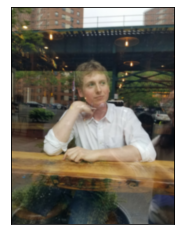

In [54]:
img = read_image(filename)
img = img[:,:,::-1]
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()

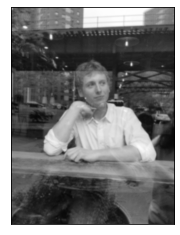

In [55]:
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

plt.imshow(img_lab[:,:,0], interpolation = 'bicubic', cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

In [56]:
stat_dist = 1 - img_lab[:, :, 0]/255
image_dims = stat_dist.shape
ini_point = tuple([int(round(x/2)) for x in image_dims])

In [57]:
it_list = metropolis_hastings(stat_dist, ini_point, it_num, bandwidth)

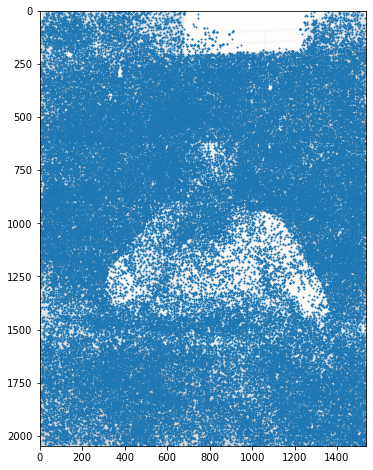

In [58]:
x, y = zip(*it_list)

plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
plt.imshow(img[:,:,::-1], interpolation = 'bicubic', alpha=0.2)
plt.plot(y, x, 'o', markersize=1)

plt.show()

In [62]:
new_img = 255*np.ones((image_dims[1], image_dims[0], 3), np.uint8)

for i in range(it_num):
    img_color = tuple(img[it_list[i][0], it_list[i][1], :])
    img_color = tuple([int(x) for x in img_color])
    new_img = cv2.circle(new_img, it_list[i], 
                         radius=point_radius,
                         color=img_color,
                         thickness=-1)
    new_img = cv2.line(new_img, it_list[i], it_list[i+1], 
                       img_color, line_width)

True

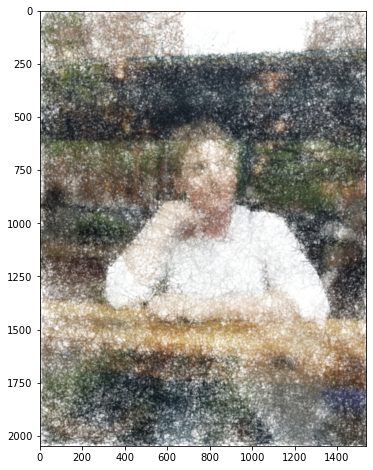

In [63]:
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
img2plt = np.swapaxes(new_img[:, :, :], 0, 1)
plt.imshow(img2plt, interpolation = 'bicubic')

cv2.imwrite(export_filename, img2plt[:,:,::-1]) 

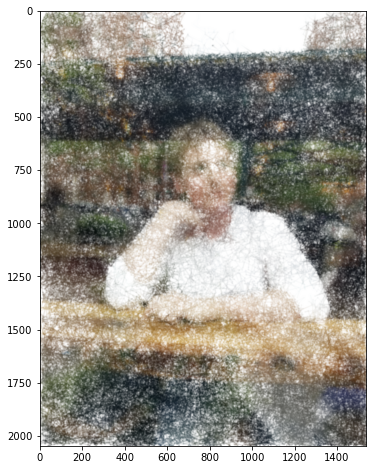

In [120]:
# optimize this, and then write a script which will work and do this all
# from the command line etc
new_img = 255*np.ones((image_dims[1], image_dims[0], 3), np.uint8)

for i in range(it_num):
    start_color = tuple(int(x) for x in img[it_list[i][0], it_list[i][1], :])
    start_color = tuple([int(x) for x in start_color])
    
    end_color = tuple(img[it_list[i+1][0], it_list[i+1][1], :])
    end_color = tuple([int(x) for x in end_color])
    
    new_img = cv2.circle(new_img, it_list[i], 
                         radius=point_radius,
                         color=start_color,
                         thickness=-1)
    
    new_line = list(zip(*line(*it_list[i], *it_list[i+1])))
    blender = np.linspace(0, 1, len(new_line))
    
    start_color = np.array(start_color)
    end_color = np.array(end_color)
    color_mix = start_color[:, np.newaxis]*(1-blender) + end_color[:, np.newaxis]*blender
    color_mix = color_mix.astype(np.uint8).transpose()
    
    for j in range(len(new_line)):
        new_img[new_line[j][::-1]] = color_mix[j]
    

plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
img2plt = np.swapaxes(new_img[:, :, :], 0, 1)
plt.imshow(img2plt, interpolation = 'bicubic')

In [8]:
import numpy as np

start = (300, 400)
end = (400, 300)

#new_line = list(zip(*line(*start, *end)))

#a = np.linspace(0, 1, len(new_line))
start_color = np.array([160, 140, 123])
end_color = np.array([146, 189, 176])

start_color = tuple([int(x) for x in start_color])
print(start_color)

color_mix = start_color[:, np.newaxis]*(1-a) + end_color[:, np.newaxis]*a
color_mix = color_mix.astype(np.uint8).transpose()

pxls = ((300, 400), (200, 100), (200, 300))

for i in range(len(new_line)):
    new_img[new_line[i]] = color_mix[i]

(160, 140, 123)


TypeError: tuple indices must be integers or slices, not tuple

In [5]:
from tqdm import tqdm

ans = 0


for i in tqdm(range(500000), desc='Adding'):
    ans = ans + i

100%|██████████████████████████████████████████████████████████████████████| 600000/600000 [00:01<00:00, 584241.53it/s]
